<a href="https://colab.research.google.com/github/Durgateja25/Data-Analytics/blob/main/Titanicsurvivalprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Libraries

In [1]:
#data processing
import pandas as pd

import numpy as np
#data visualisation
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

#Algorithms
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC,LinearSVC

#Load Libraries

In [2]:
test_df = pd.read_csv('/content/test.csv')
train_df = pd.read_csv('/content/train.csv')

#EDA

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   name      891 non-null    object 
 3   sex       891 non-null    object 
 4   age       714 non-null    float64
 5   sibsp     891 non-null    int64  
 6   parch     891 non-null    int64  
 7   ticket    891 non-null    object 
 8   fare      891 non-null    float64
 9   cabin     204 non-null    object 
 10  embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [4]:
train_df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train_df.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
total = train_df.isnull().sum().sort_values(ascending = False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1,1)).sort_values(ascending = False)
missing_data = pd.concat([total, percent_2], axis = 1, keys = ['total','%'])
missing_data.head(5)

,total,%
cabin,687,77.1
age,177,19.9
embarked,2,0.2
survived,0,0.0
pclass,0,0.0


In [7]:
train_df.columns.values

array(['survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked'], dtype=object)

<ipython-input-8-e47e8f35f46f>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(women[women['survived'] == 1].age.dropna(), bins = 18, label = survived, ax = axes[0],kde = False)
<ipython-input-8-e47e8f35f46f>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(women[women['survived'] == 

Text(0.5, 1.0, 'Male')

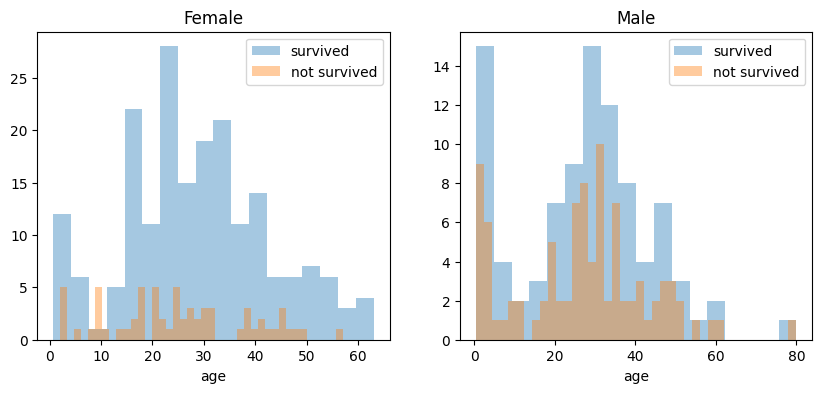

In [8]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(ncols =2, nrows = 1, figsize = (10, 4))
women = train_df[train_df['sex'] == 'female']
men = train_df[train_df['sex'] == 'male']
ax = sns.distplot(women[women['survived'] == 1].age.dropna(), bins = 18, label = survived, ax = axes[0],kde = False)
ax = sns.distplot(women[women['survived'] == 0].age.dropna(), bins = 40, label = not_survived, ax = axes[0], kde = False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['survived'] == 1].age.dropna(), bins = 18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['survived'] == 1].age.dropna(), bins = 40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
ax.set_title('Male')


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)


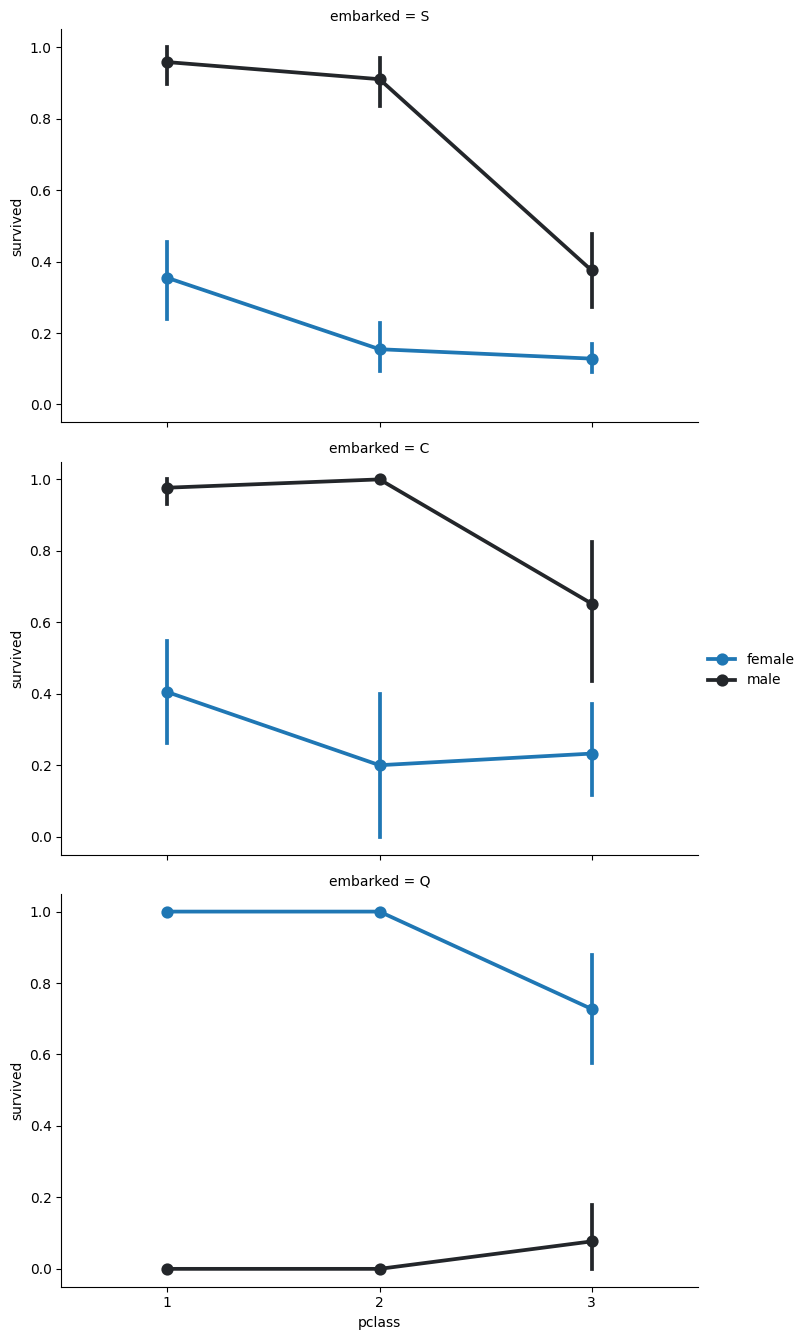

In [9]:
FacetGrid = sns.FacetGrid(train_df, row = 'embarked', height = 4.5, aspect = 1.6)
FacetGrid.map(sns.pointplot, 'pclass','survived','sex', palette = None, order = None, hue_order = None)
FacetGrid.add_legend()

<ipython-input-10-a5e100c8bf63>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'pclass', y = 'survived', data = train_df,palette = 'cool')


<Axes: xlabel='pclass', ylabel='survived'>

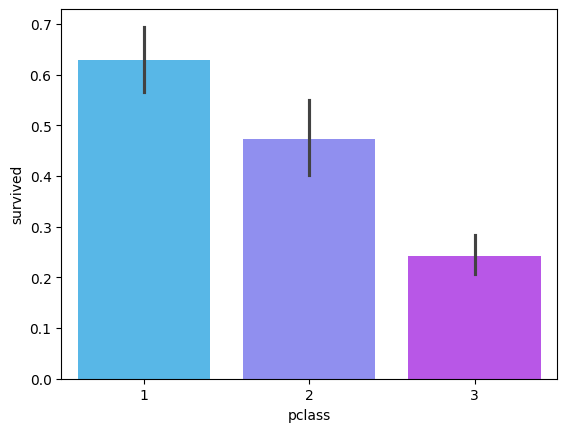

In [10]:
sns.barplot(x = 'pclass', y = 'survived', data = train_df,palette = 'cool')

In [11]:
data = [train_df, test_df]
for dataset in data:
    dataset['relatives'] = dataset['sibsp'] + dataset['parch']
    dataset.loc[dataset['relatives'] > 0, 'not alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not alone'] = 1
    dataset['not alone'] = dataset['not alone'].astype(int)
train_df['not alone'].value_counts()



,count
not alone,
1,537
0,354


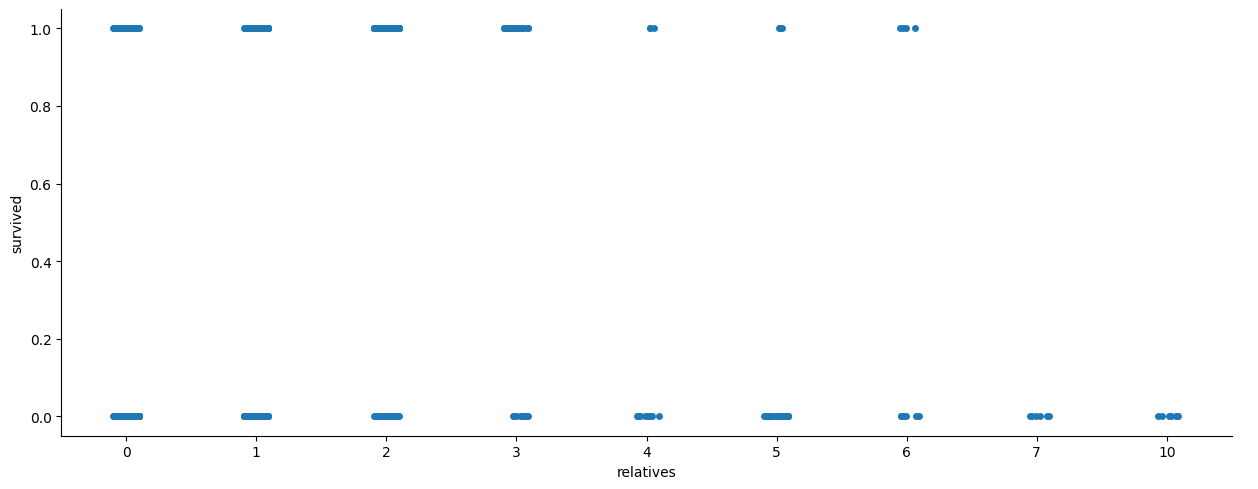

In [12]:
axes = sns.catplot(x = 'relatives', y = 'survived', data=train_df, aspect = 2.5) # removed data as the first positional argument.

In [13]:
!pip install seaborn --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 4.4 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1


#Data Preprocesing and Feature Engineering

In [14]:
import re
Deck = {"A" : 1, "B" : 2, "C" : 3, "D" : 4, "E" : 5, "F" : 6, "G" : 7, "U" : 8}
data = [train_df, test_df]

for dataset in data:
  dataset['cabin'] = dataset['cabin'].fillna("U0")
  dataset['deck'] = dataset['cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
  dataset['deck'] = dataset['deck'].map(Deck)
  dataset['deck'] = dataset['deck'].fillna(0)
  dataset['deck'] = dataset['deck'].astype(int)
#We can now drop the cabin feature
train_df = train_df.drop(['cabin'], axis = 1)
test_df = test_df.drop(['cabin'], axis = 1)

In [15]:
train_df.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,relatives,not alone,deck
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,8
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0,3
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1,8
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,0,3
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,8


In [16]:
data = [train_df, test_df]

for dataset in data:
  mean = train_df['age'].mean()
  std = train_df['age'].std()
  is_null = dataset['age'].isnull().sum()
  #compute random numbers between the mean, std and is_null
  rand_age = np.random.randint(mean - std, mean + std, size = is_null)
  # fill NaN values in age column with random values generated
  age_slice = dataset["age"].copy()
  age_slice[np.isnan(age_slice)] = rand_age
  dataset['age'] = age_slice
  dataset['age'] = train_df['age'].astype(int)
train_df.isnull().sum()


,0
survived,0
pclass,0
name,0
sex,0
age,0
sibsp,0
parch,0
ticket,0
fare,0
embarked,2


In [17]:
train_df['embarked'].describe()

,embarked
count,889
unique,3
top,S
freq,644


In [18]:
common_value = 'S'
data = [train_df, test_df]

for dataset in data:
  dataset['embarked'] = dataset['embarked'].fillna(common_value)


In [19]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   survived   891 non-null    int64  
 1   pclass     891 non-null    int64  
 2   name       891 non-null    object 
 3   sex        891 non-null    object 
 4   age        891 non-null    int64  
 5   sibsp      891 non-null    int64  
 6   parch      891 non-null    int64  
 7   ticket     891 non-null    object 
 8   fare       891 non-null    float64
 9   embarked   891 non-null    object 
 10  relatives  891 non-null    int64  
 11  not alone  891 non-null    int64  
 12  deck       891 non-null    int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 90.6+ KB


In [20]:
data = [train_df, test_df]

for dataset in data:
  dataset['fare'] = dataset['fare'].fillna(0)
  dataset['fare'] = dataset['fare'].astype(int)

In [21]:
data = [train_df, test_df]
Titles = {"Mr" : 1, "Miss" : 2, "Mrs" : 3, "Master" : 4, "Rare" : 5 }

for dataset in data:
  #extract files
  dataset['Title'] = dataset.name.str.extract(' ([A-Za-z]+)\.', expand = False)
  #replace titles with a more common title or as Rare
  dataset['Title'] = dataset['Title'].replace(['Lady','Countess','Capt','Col','Don','Dr',\
                                               'Major','Rev','Sir','Jonkheer', 'Dona'],'Rare') # Changed 'title' to 'Title'
  dataset['Title'] = dataset['Title'].replace('Mlle','Miss') # Changed 'title' to 'Title'
  dataset['Title'] = dataset['Title'].replace('Ms','Miss') # Changed 'title' to 'Title'
  dataset['Title'] = dataset['Title'].replace('Mms','Mrs') # Changed 'title' to 'Title'
  #converts titles into numbers
  dataset['Title'] = dataset['Title'].map(Titles) # Changed 'title' to 'Title'
  #filling NaN with zero to get safe
  dataset['Title'] = dataset['Title'].fillna(0) # Changed 'title' to 'Title'
train_df = train_df.drop(['name'], axis = 1)
test_df = test_df.drop(['name'], axis = 1)

In [22]:
train_df.head()

,survived,pclass,sex,age,sibsp,parch,ticket,fare,embarked,relatives,not alone,deck,Title
0,0,3,male,22,1,0,A/5 21171,7,S,1,0,8,1.0
1,1,1,female,38,1,0,PC 17599,71,C,1,0,3,3.0
2,1,3,female,26,0,0,STON/O2. 3101282,7,S,0,1,8,2.0
3,1,1,female,35,1,0,113803,53,S,1,0,3,3.0
4,0,3,male,35,0,0,373450,8,S,0,1,8,1.0


In [23]:
genders = {"male" : 0, "female" : 1}
data = [train_df,test_df]

for dataset in data:
  dataset['sex'] = dataset['sex'].map(genders)

In [24]:
train_df['ticket'].describe()

,ticket
count,891
unique,681
top,347082
freq,7


In [25]:
train_df = train_df.drop(['ticket'],axis=1)
test_df = test_df.drop(['ticket'], axis = 1)

In [26]:
ports = {"S" : 0, "C" : 1, "Q" : 2}
data = [train_df, test_df]

for dataset in data:
  dataset['embarked'] = dataset['embarked'].map(ports)

In [27]:
data = [train_df, test_df]
for dataset in data:
  dataset['age'] = dataset['age'].astype(int)
  dataset.loc[dataset['age'] <= 11, 'age'] = 0
  dataset.loc[(dataset['age']>11) & (dataset['age']<=18),'age'] = 1
  dataset.loc[(dataset['age']>18) & (dataset['age'] <=22),'age'] = 2
  dataset.loc[(dataset['age']>22) & (dataset['age'] <=27), 'age'] = 3
  dataset.loc[(dataset['age']>27) & (dataset['age'] <=33),'age'] = 4
  dataset.loc[(dataset['age']>33) & (dataset['age'] <=40), 'age'] = 5
  dataset.loc[(dataset['age']>40) & (dataset['age'] <=66), 'age'] = 6
  dataset.loc[(dataset['age']>66),'age'] = 7

#Let's see how it is distributed
train_df['age'].value_counts()

,count
age,
4,161
6,161
5,144
3,136
2,123
1,91
0,68
7,7


In [28]:
train_df['Title'] = train_df['Title'].astype(int)

In [29]:
train_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,relatives,not alone,deck,Title
0,0,3,0,2,1,0,7,0,1,0,8,1
1,1,1,1,5,1,0,71,1,1,0,3,3
2,1,3,1,3,0,0,7,0,0,1,8,2
3,1,1,1,5,1,0,53,0,1,0,3,3
4,0,3,0,5,0,0,8,0,0,1,8,1


In [30]:
data = [train_df, test_df]

for dataset in data:
  dataset.loc[ dataset['fare'] <= 7.91, 'fare'] = 0
  dataset.loc[ (dataset['fare'] > 7.91) & (dataset['fare'] <= 14.454), 'fare'] = 1
  dataset.loc[(dataset['fare'] > 14.4540) & (dataset['fare'] <=31), 'fare'] = 2
  dataset.loc[(dataset['fare'] > 31) & (dataset['fare'] <= 99), 'fare'] = 3
  dataset.loc[(dataset['fare'] >99) & (dataset['fare'] <=250), 'fare'] = 4
  dataset.loc[dataset['fare'] >250,'fare'] = 5
  dataset['fare'] = dataset['fare'].astype(int)

In [31]:
data = [train_df, test_df]

for dataset in data:
  dataset['age_class'] = dataset['age']*dataset['pclass']

In [32]:
for dataset in data:
  dataset['fare_per_person'] = dataset['fare']/(dataset['relatives']+1)
  dataset['fare_per_person'] = dataset['fare_per_person'].astype(int)

train_df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,relatives,not alone,deck,Title,age_class,fare_per_person
0,0,3,0,2,1,0,0,0,1,0,8,1,6,0
1,1,1,1,5,1,0,3,1,1,0,3,3,5,1
2,1,3,1,3,0,0,0,0,0,1,8,2,9,0
3,1,1,1,5,1,0,3,0,1,0,3,3,5,1
4,0,3,0,5,0,0,1,0,0,1,8,1,15,1
5,0,3,0,4,0,0,1,2,0,1,8,1,12,1
6,0,1,0,6,0,0,3,0,0,1,5,1,6,3
7,0,3,0,0,3,1,2,0,4,0,8,4,0,0
8,1,3,1,3,0,2,1,0,2,0,8,3,9,0
9,1,2,1,1,1,0,2,1,1,0,8,3,2,1


In [33]:
test_df.head()

,pclass,sex,age,sibsp,parch,fare,embarked,relatives,not alone,deck,Title,age_class,fare_per_person
0,3,0,2,0,0,0,2,0,1,8,1,6,0
1,3,1,5,1,0,0,0,1,0,8,3,15,0
2,2,0,3,0,0,1,2,0,1,8,1,6,1
3,3,0,5,0,0,1,0,0,1,8,1,15,1
4,3,1,5,1,1,1,0,2,0,8,3,15,0


In [34]:
X_train = train_df.drop('survived', axis = 1)
Y_train = train_df['survived']
X_test = test_df.copy()


#Modelling

In [35]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train)*100, 2)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,Y_train)

Y_pred = decision_tree.predict(X_test)

acc_tree = round(decision_tree.score(X_train, Y_train)*100,2)

In [37]:
random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random = round(random_forest.score(X_train, Y_train)*100,2)


In [38]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear = round(linear_svc.score(X_train, Y_train)*100,2)

In [39]:
results = pd.DataFrame({
    'Model' : ['Support Vector Machines','Logistic Regression','Random Forest','Decision Tree'],
    'Score' : [acc_linear, acc_log, acc_random,acc_tree]
})
result_df = results.sort_values(by='Score', ascending = False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
92.59,Random Forest
92.59,Decision Tree
81.71,Logistic Regression
81.59,Support Vector Machines


In [40]:
#Cross Validation
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train,Y_train,cv = 10, scoring = "accuracy")
print("Scores" ,scores)
print("Mean" ,scores.mean())
print("Standard Deviation",scores.std())

Scores [0.76666667 0.82022472 0.74157303 0.82022472 0.88764045 0.84269663
 0.78651685 0.7752809  0.85393258 0.80898876]
Mean 0.8103745318352059
Standard Deviation 0.04189605250602084


In [41]:
importances = pd.DataFrame({'feature' : X_train.columns,'importance' : np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending = False).set_index('feature')
importances.head(15)

,importance
feature,
Title,0.200
sex,0.173
age_class,0.100
deck,0.083
pclass,0.078
age,0.076
fare,0.065
relatives,0.054
embarked,0.052


<Axes: xlabel='feature'>

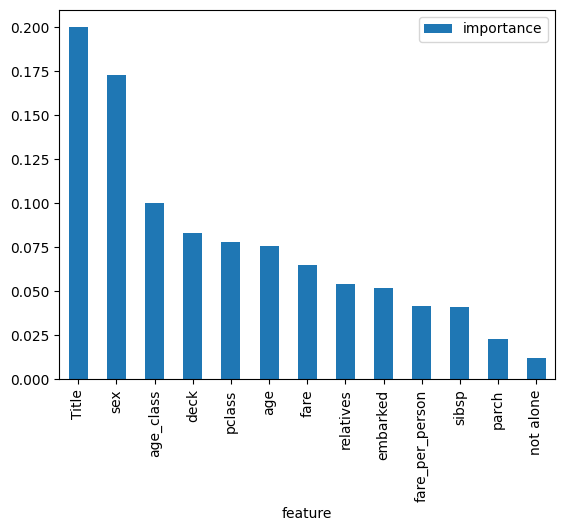

In [42]:
importances.plot.bar()

In [43]:
X_test.head()

,pclass,sex,age,sibsp,parch,fare,embarked,relatives,not alone,deck,Title,age_class,fare_per_person
0,3,0,2,0,0,0,2,0,1,8,1,6,0
1,3,1,5,1,0,0,0,1,0,8,3,15,0
2,2,0,3,0,0,1,2,0,1,8,1,6,1
3,3,0,5,0,0,1,0,0,1,8,1,15,1
4,3,1,5,1,1,1,0,2,0,8,3,15,0


In [44]:
X_train1 = train_df.drop(['parch','not alone', 'survived'], axis = 1) # Remove 'survived' from the features
Y_train1 = train_df['survived']
X_test1 = test_df.drop(['parch','not alone'],axis=1).copy()

from sklearn.linear_model import LogisticRegression
logreg1 = LogisticRegression()
logreg1.fit(X_train1, Y_train1)

Y_pred1 = logreg1.predict(X_test1)

acc_log1 = round(logreg1.score(X_train1, Y_train1)*100, 2)

In [45]:
decision_tree1 = DecisionTreeClassifier()
decision_tree1.fit(X_train1,Y_train1)

Y_pred = decision_tree1.predict(X_test1)

acc_tree1 = round(decision_tree1.score(X_train1, Y_train1)*100,2)

In [46]:
random_forest1 = RandomForestClassifier(n_estimators = 100)
random_forest1.fit(X_train1, Y_train1)

Y_prediction1 = random_forest1.predict(X_test1)

random_forest1.score(X_train1, Y_train1)
acc_random1 = round(random_forest1.score(X_train1, Y_train1)*100,2)


In [47]:
linear_svc1 = LinearSVC()
linear_svc1.fit(X_train1, Y_train1)

Y_pred1 = linear_svc1.predict(X_test1)

acc_linear1 = round(linear_svc1.score(X_train1, Y_train1)*100,2)

In [48]:
results = pd.DataFrame({
    'Model' : ['Support Vector Machines','Logistic Regression','Random Forest','Decision Tree'],
    'Score' : [acc_linear1, acc_log1, acc_random1,acc_tree1]
})
result_df = results.sort_values(by='Score', ascending = False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
92.59,Random Forest
92.59,Decision Tree
81.82,Logistic Regression
81.48,Support Vector Machines


In [49]:
importances = pd.DataFrame({'feature' : X_train1.columns,'importance' : np.round(random_forest1.feature_importances_,3)})
importances = importances.sort_values('importance',ascending = False).set_index('feature')
importances.head(15)

,importance
feature,
Title,0.204
sex,0.171
age_class,0.098
pclass,0.080
deck,0.079
age,0.078
relatives,0.075
fare,0.071
embarked,0.052


In [50]:
#hyperparameter tuning
#Random Forest
random_forest = RandomForestClassifier(criterion = "gini",
                                       min_samples_leaf = 1,
                                       min_samples_split = 10,
                                       n_estimators = 100,
                                       max_features = 'sqrt',
                                       oob_score = True,
                                       random_state = 1,
                                       n_jobs = -1)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

print("oob Score:", round(random_forest.oob_score_,4)*100,"%")


oob Score: 83.05 %


In [51]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(logreg, X_train, Y_train, cv = 3)
confusion_matrix(Y_train, predictions)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[460,  89],
       [ 89, 253]])

In [53]:
from sklearn.metrics import precision_score, recall_score

print("Precision :",precision_score(Y_train, predictions))
print("Recall :",recall_score(Y_train, predictions))

Precision : 0.7397660818713451
Recall : 0.7397660818713451


In [54]:
  from sklearn.metrics import f1_score
  f1_score(Y_train, predictions)

0.7397660818713451

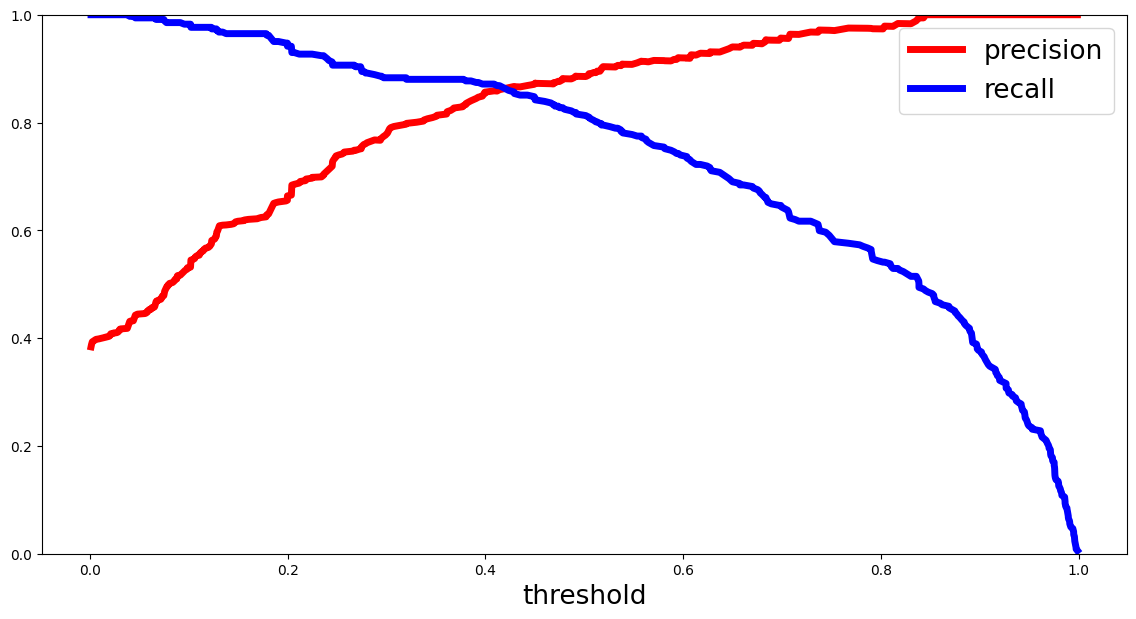

In [66]:
from sklearn.metrics import precision_recall_curve

#getting the probabilities of our predictions
y_scores = random_forest.predict_proba(X_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(Y_train, y_scores)
def plot_preciion_and_recall(precision, recall, threshold) :
  plt.plot(threshold, precision[:-1],"r-",label = "precision", linewidth = 5)
  plt.plot(threshold, recall[:-1],"b", label = "recall", linewidth = 5)
  plt.xlabel("threshold", fontsize = 19)
  plt.legend(loc = "upper right", fontsize = 19)
  plt.ylim([0,1])

plt.figure(figsize = (14,7))
plot_preciion_and_recall(precision, recall, threshold)
plt.show()


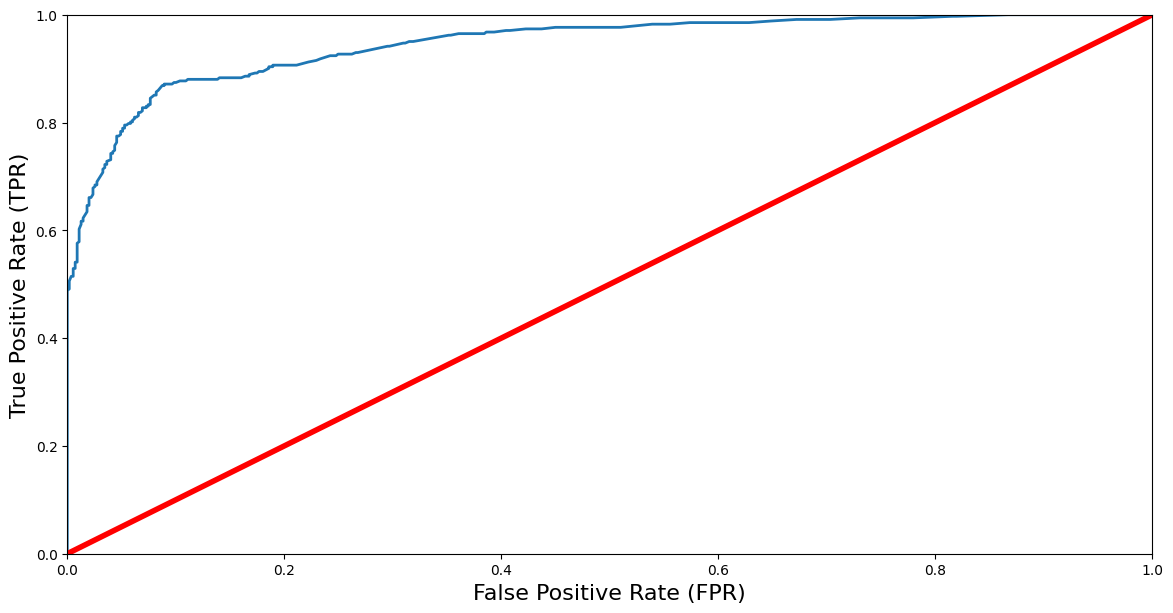

In [67]:
from sklearn.metrics import roc_curve

#compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, y_scores)
#plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label = None):
  plt.plot(false_positive_rate, true_positive_rate, linewidth = 2, label=label)
  plt.plot([0, 1],[0,1],'r', linewidth = 4)
  plt.axis([0, 1, 0, 1])
  plt.xlabel('False Positive Rate (FPR)', fontsize = 16)
  plt.ylabel('True Positive Rate (TPR)', fontsize = 16)

plt.figure(figsize = (14,7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()


In [68]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(Y_train, y_scores)
print("ROC-AUC-Score :", r_a_score)

ROC-AUC-Score : 0.9455522534326101
